In [1]:
# Jupyter notebook magic to reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append(
    "/home/Marc/Marc_network_sims",
)  # path to the code with the functions

## Load file


In [3]:
import pickle

# Path to the pickle file
pkl_path_1 = "/mnt/internserver1_1tb/data/MarcData/Data14_Current_Burst/gna_0.50_gk_0.70_noise_1.30/00.pkl"

# Load the pickle file
# load path 1
try:
    with open(pkl_path_1, "rb") as file:
        data = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

numprocs=1
Data loaded successfully.


## Scatter


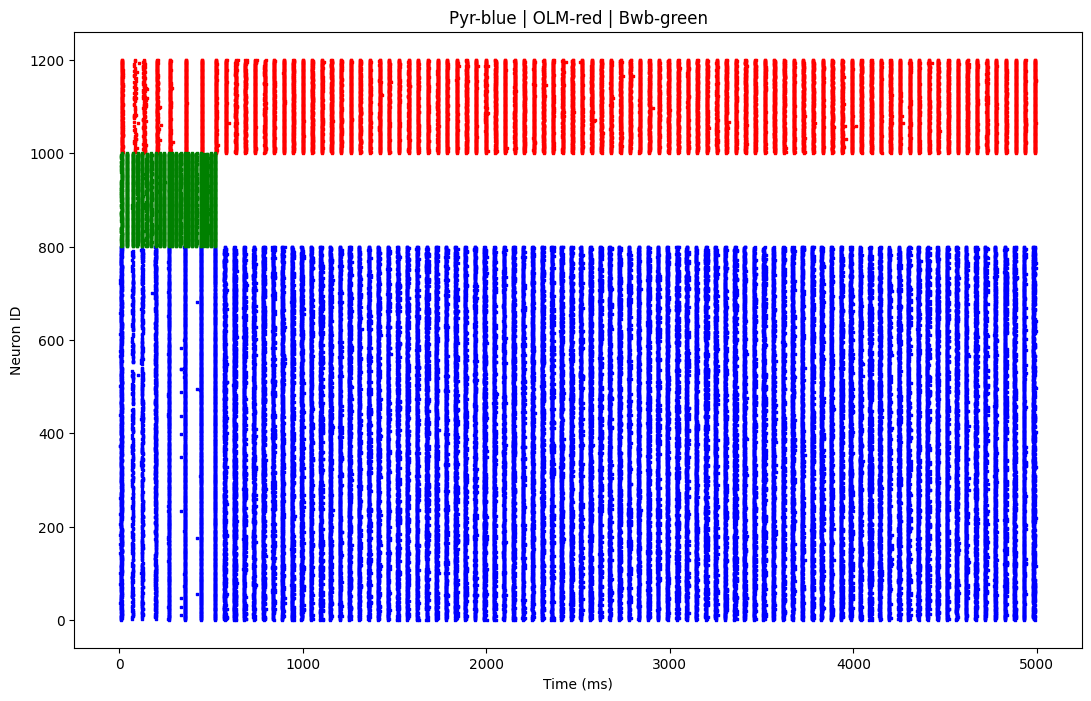

In [4]:
from src.SanjayCode import scatter_plot

scatter_plot(
    data["simData"]
)  # Pyr NA 1.0, noise 1.0 (20X external input increase from baseline)

In [5]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt


def gaus_cache(mean=0, std_dev=20, window_size=100):
    """
    Generate a Gaussian window for convolution.
    """
    return np.exp(
        -((np.arange(mean - window_size, mean + window_size) - mean) ** 2)
        / (2 * std_dev**2)
    ) / (std_dev * np.sqrt(2 * np.pi))


def convolve_single_cell(
    spike_times, std_dev=20, window_size=100, total_duration=5000, time_resolution=1
):
    """
    Perform convolution for a single cell's spike data.
    """
    # Create a time series
    time_series = np.zeros(total_duration)
    spike_indices = (spike_times / time_resolution).astype(int)
    time_series[spike_indices] = 1

    # Generate Gaussian window
    gaussian_window = gaus_cache(std_dev=std_dev, window_size=window_size)
    gaussian_window /= np.sum(gaussian_window)  # Normalize the window

    # Convolution
    return np.convolve(time_series, gaussian_window, mode="same")


def convolve_multiple_cells(
    data,
    gid_start,
    gid_end,
    std_dev=20,
    window_size=100,
    total_duration=5000,
    time_resolution=1,
):
    """
    Perform convolution for multiple cells' spike data.
    """
    all_spike_times = (
        np.concatenate(
            [
                data["simData"][gid].spike_times
                for gid in range(gid_start, gid_end + 1)
                if gid in data["simData"]
            ],
            axis=0,
        )
        if any(gid in data["simData"] for gid in range(gid_start, gid_end + 1))
        else np.array([])
    )

    return convolve_single_cell(
        all_spike_times, std_dev, window_size, total_duration, time_resolution
    )

## Basket Convolutions


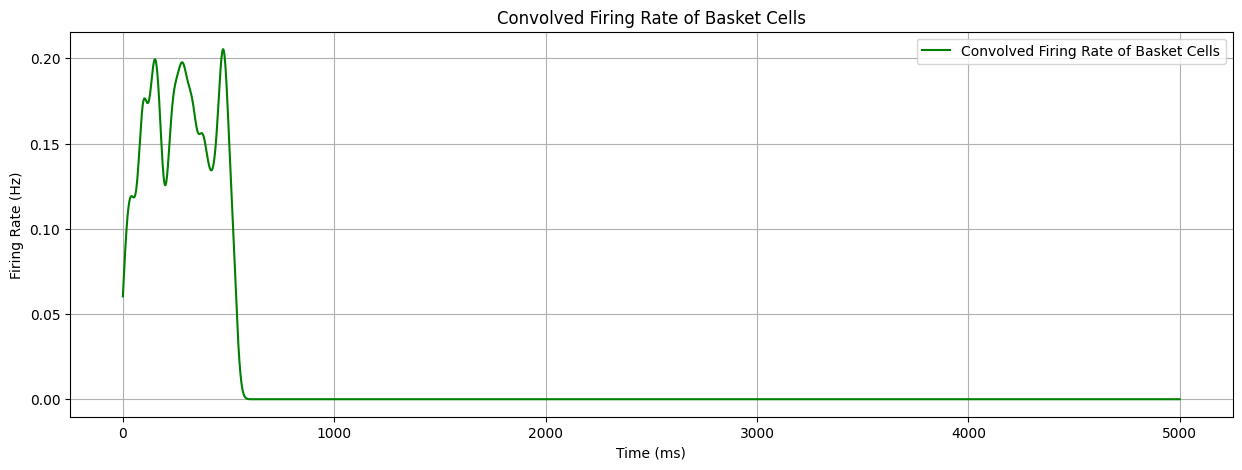

In [6]:
basket_spike_times = convolve_multiple_cells(data, 800, 999)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(
    basket_spike_times, label="Convolved Firing Rate of Basket Cells", color="green"
)
plt.title("Convolved Firing Rate of Basket Cells")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.legend()
plt.grid(True)
plt.show()

## Pyr Convolutions


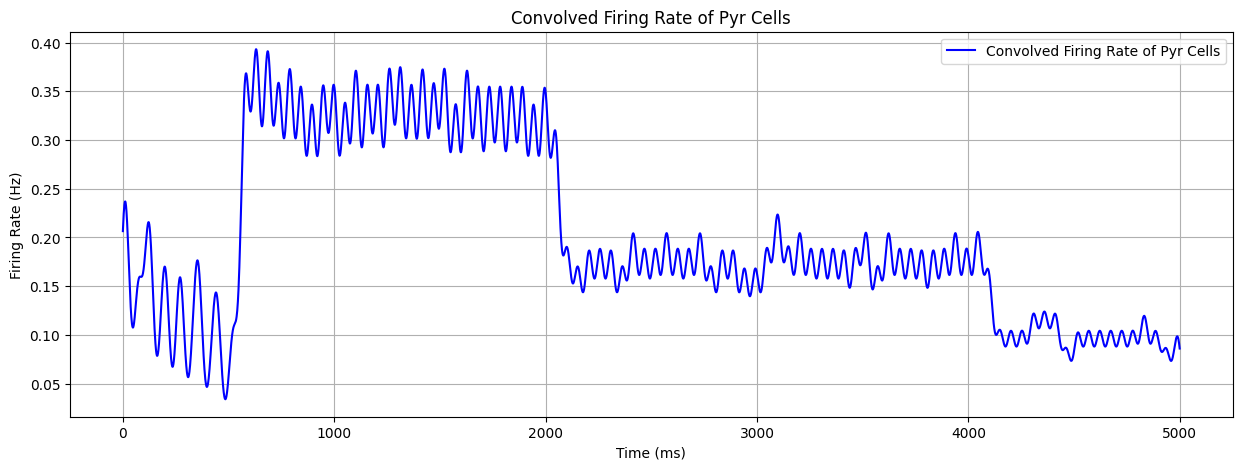

In [7]:
pyr_spike_times = convolve_multiple_cells(data, 0, 799)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(pyr_spike_times, label="Convolved Firing Rate of Pyr Cells", color="blue")
plt.title("Convolved Firing Rate of Pyr Cells")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.legend()
plt.grid(True)
plt.show()

## OLM Convolutions


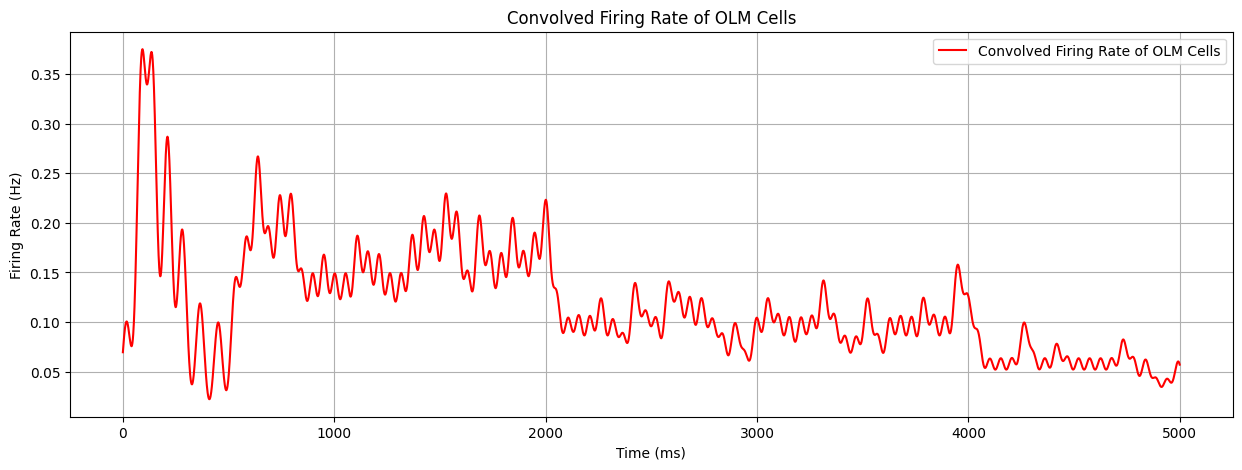

In [8]:
olm_spike_times = convolve_multiple_cells(data, 1000, 1200)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(olm_spike_times, label="Convolved Firing Rate of OLM Cells", color="red")
plt.title("Convolved Firing Rate of OLM Cells")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.legend()
plt.grid(True)
plt.show()

## All population convolutions


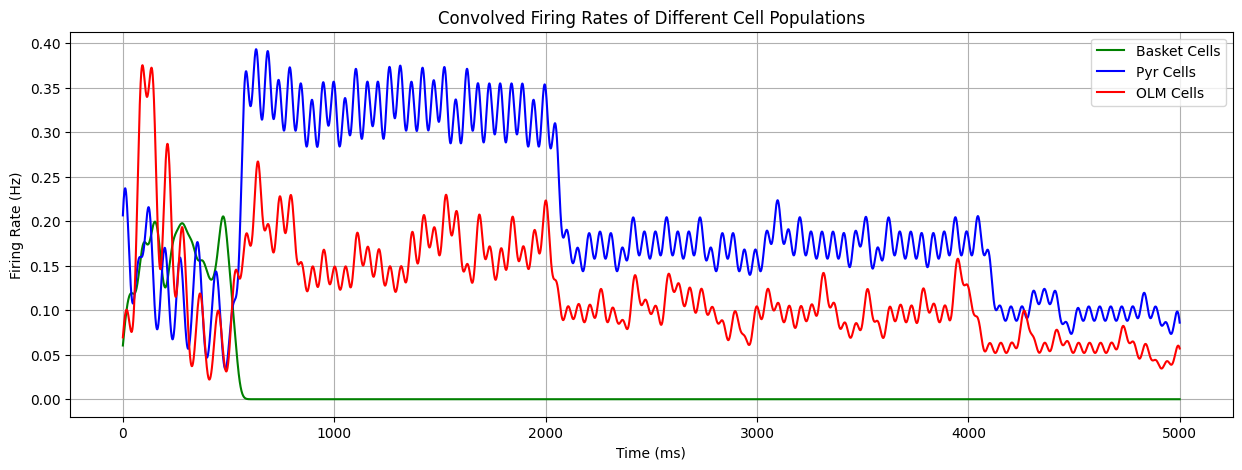

In [9]:
basket_spike_times = convolve_multiple_cells(data, 800, 999)
pyr_spike_times = convolve_multiple_cells(data, 0, 799)
olm_spike_times = convolve_multiple_cells(data, 1000, 1200)

# Plotting all populations together
plt.figure(figsize=(15, 5))

plt.plot(basket_spike_times, label="Basket Cells", color="green")

plt.plot(pyr_spike_times, label="Pyr Cells", color="blue")

plt.plot(olm_spike_times, label="OLM Cells", color="red")

plt.title("Convolved Firing Rates of Different Cell Populations")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.legend()
plt.grid(True)
plt.show()

# Depolarization block in Basket cells


In [10]:
# Path to the pickle file
pkl_path_1 = "/mnt/internserver1_1tb/data/MarcData/Data14_Current_Burst/gna_0.50_gk_0.70_noise_1.30/00.pkl"

# Load the pickle in path 1
try:
    with open(pkl_path_1, "rb") as file:
        data = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

Data loaded successfully.


Depolarization block from 538ms to 5000ms, Duration: 4462ms
Total Depolarization Duration: 4462ms


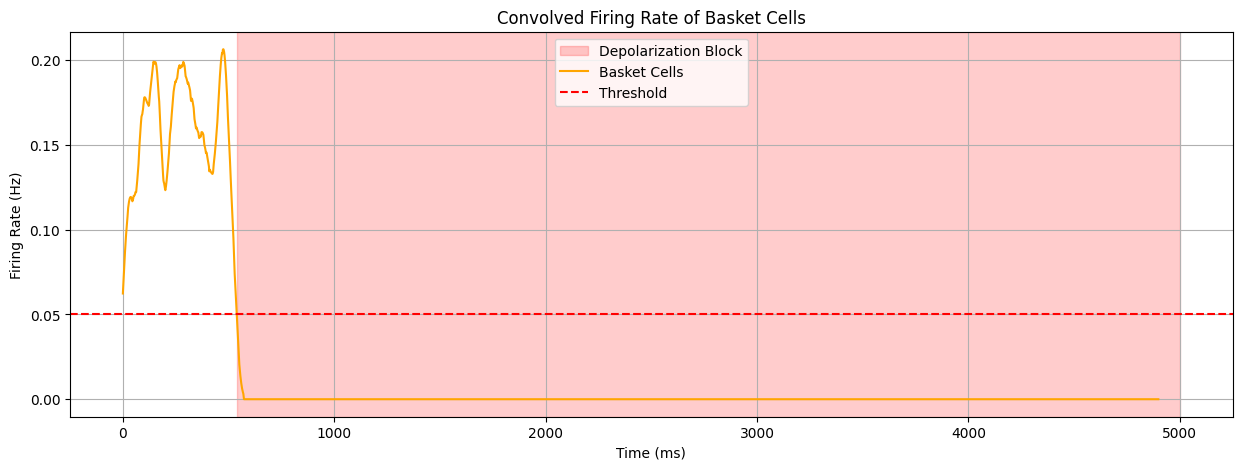

In [11]:
from src.SanjayCode import (
    get_spike_times_for_basket_cells,
    create_time_series,
    apply_gaussian_convolution,
    detect_depolarization_blocks,
    plot_results,
)

# Example usage
basket_spike_times = get_spike_times_for_basket_cells(
    data, 800, 999
)  # Assumes data is defined elsewhere
total_duration = 5000  # in ms
time_series = create_time_series(basket_spike_times, total_duration)

# Apply Gaussian convolution
convolved_signal = apply_gaussian_convolution(time_series)

# Detect depolarization blocks
(
    depolarization_starts,
    depolarization_ends,
    threshold,
    total_depolarization_duration,
) = detect_depolarization_blocks(convolved_signal, total_duration)

# Plot the results
plot_results(
    convolved_signal,
    depolarization_starts,
    depolarization_ends,
    threshold,
    total_duration,
)